### Flash attention简介
在计算transforemer的时候，如果Q,K,V的矩阵相当大的话，就会使所有的矩阵计算都涉及到GPU的慢速内存，无法一次性存入GPU的高速缓存（SRAM），必须频繁地在显存（HBM）和SRAM之间进行读写。HBM读写是注意力机制的计算瓶颈，这在处理长文本、高分辨率图像等任务时尤为明显。
 - HBM（High Bandwidth Memory）：显存，容量大但带宽有限，访问速度相对较慢。
 - SRAM（Static Random-Access Memory）：GPU的片上高速缓存，容量小但带宽极高，访问速度非常快。

### 计算过程

分块计算：将输入序列的 Q,K,V 张量分成多个小块。

SRAM内循环：在SRAM中，每次取一个 Q 块和一个 K,V 块进行计算，得到一个小的注意力得分块和输出块。

在线Softmax：这是最关键的一步。传统的Softmax需要计算完所有得分后再进行归一化，而FlashAttention则通过一个增量式（incremental）的Softmax算法，在SRAM内逐步累积计算Softmax结果，无需将整个注意力矩阵保存下来。

避免物化：由于每一步的计算结果都直接用于下一轮迭代，并且Softmax也是在线进行的，因此不再需要将完整的中间注意力矩阵（Q
timesK 
T
 ）写入到显存中。这极大地减少了HBM的读写量。

In [ ]:
import torch
from flash_attn import flash_attn_qkvpacked_func

# 假设qkv是经过封装的[q, k, v]张量
# qkv shape: [batch_size, seq_len, 3, num_heads, head_dim]
# output shape: [batch_size, seq_len, num_heads, head_dim]
output = flash_attn_qkvpacked_func(qkv)

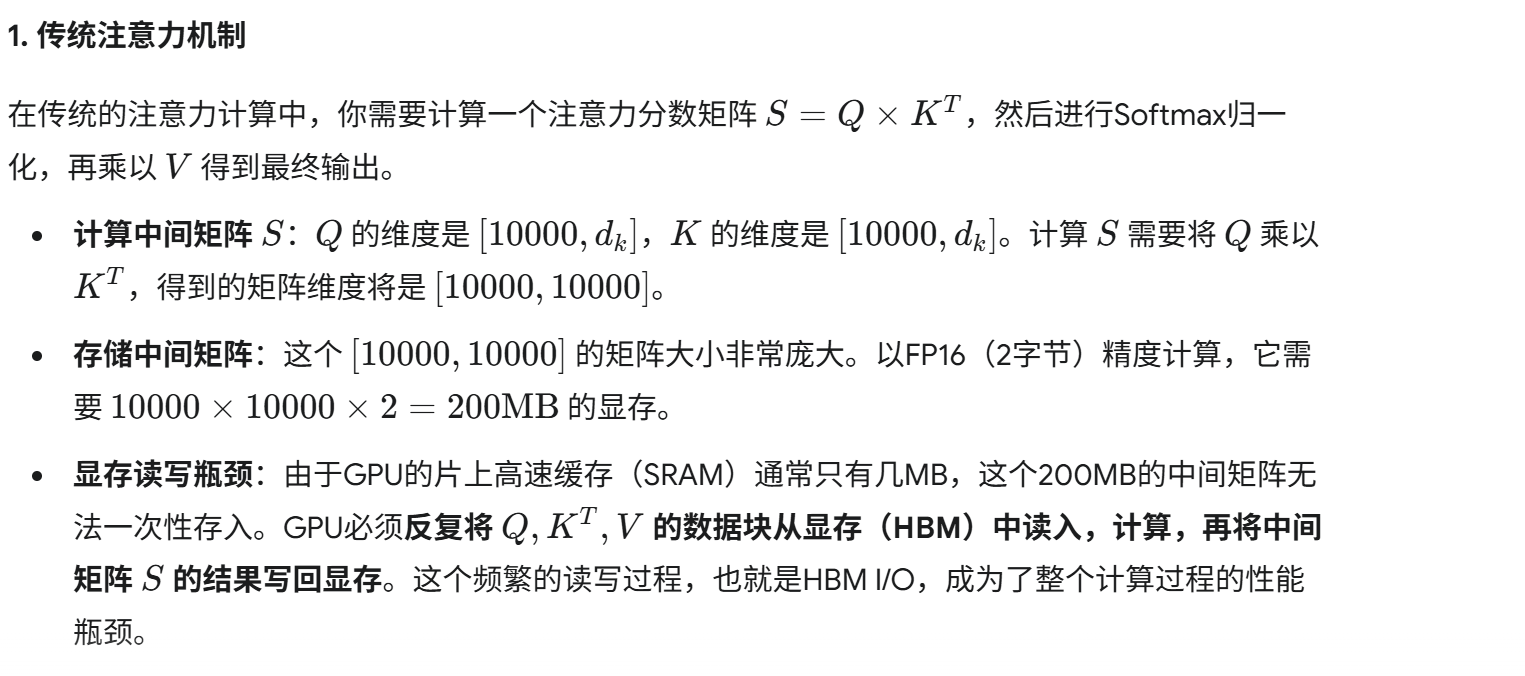
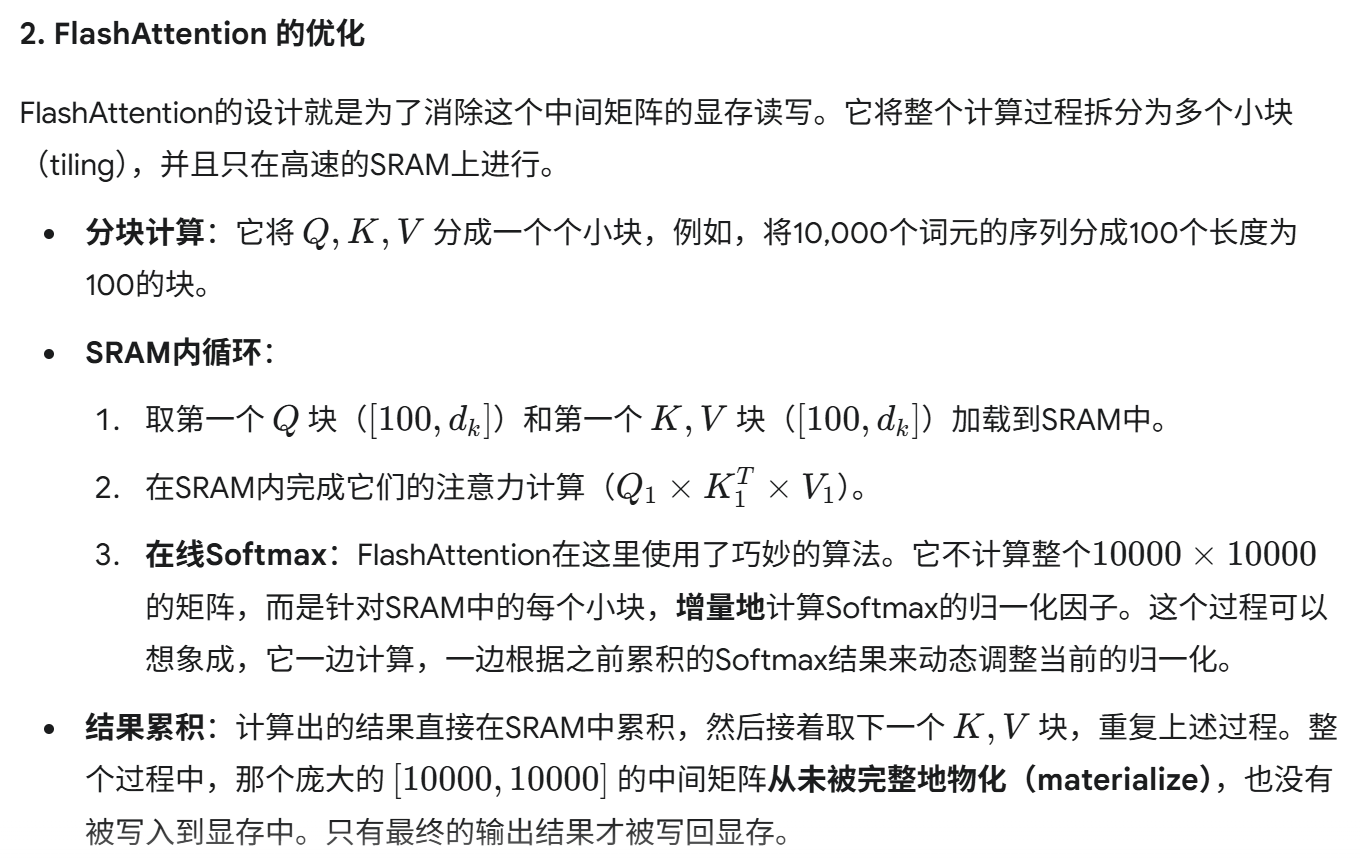